In [1]:
import sys
sys.path.append('../')

In [2]:
import config

In [ ]:
config.DataConfig.BASE_DIR = "../"

# Data Preprocessing

In [3]:
from data_preprocessing import DataPreprocessor

In [4]:
preprocessor = DataPreprocessor()

In [5]:
df = preprocessor.load_data()

2025-02-17 01:53:13,383 - root - INFO - Loading data from ../data\creditcard.csv


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
preprocessor.preprocess()

2025-02-17 01:53:15,618 - root - INFO - Data preprocessed successfully


In [8]:
preprocessor.save_processed_data()

2025-02-17 01:53:15,635 - root - INFO - Saving processed data to ../data\processed_creditcard.csv


# Modeling

In [9]:
from modeling import ModelTrainer

In [10]:
from sklearn.metrics import confusion_matrix
from utils import ConfusionMatrixPlotter


def plot_confusion_matrix(y_test, y_pred, model_type):
    cm_matrix = confusion_matrix(y_test, y_pred.round())
    cm_plotter = ConfusionMatrixPlotter(cm_matrix, classes=['Not Fraud', 'Fraud'])
    cm_plotter.plot(save_plot=config.VisualizationConfig.SAVE_PLOT, model_type=model_type)

In [11]:
results = []

## Decision Tree

In [12]:
model_type = "decision_tree"

In [13]:
trainer = ModelTrainer(model_type)

In [14]:
trainer.data_splitting()

2025-02-17 01:53:39,735 - root - INFO - Data loaded and split into training and testing sets


In [15]:
y_pred, y_test = trainer.training()

2025-02-17 01:54:01,888 - root - INFO - decision_tree training completed


In [16]:
trainer.evaluate_performance(y_pred)

{'model': 'decision_tree',
 'accuracy': 0.9993328885923949,
 'precision': 0.835820895522388,
 'recall': 0.7619047619047619,
 'f1_score': 0.797153024911032}

In [17]:
results.append(trainer.evaluate_performance(y_pred))

Confusion matrix, without normalization
[[85274    22]
 [   35   112]]


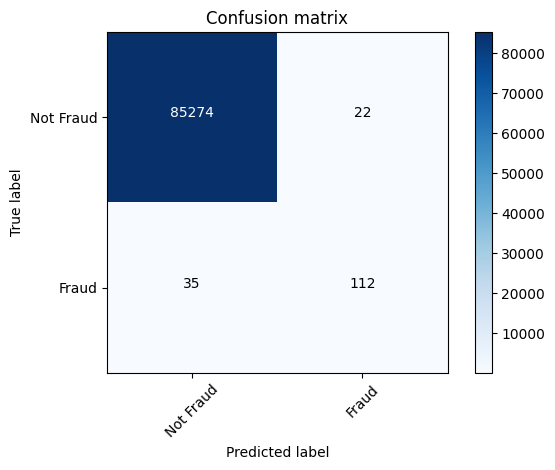

In [18]:
plot_confusion_matrix(y_test, y_pred, model_type)

## Random Forest

In [19]:
model_type= "random_forest"

In [20]:
trainer = ModelTrainer(model_type=model_type)

In [21]:
trainer.data_splitting()

2025-02-17 01:54:05,196 - root - INFO - Data loaded and split into training and testing sets


In [22]:
y_pred, y_test = trainer.training()

c:\Users\Eda AYDIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
2025-02-17 01:58:55,628 - root - INFO - random_forest training completed


In [23]:
trainer.evaluate_performance(y_pred)

{'model': 'random_forest',
 'accuracy': 0.9995084442259752,
 'precision': 0.9411764705882353,
 'recall': 0.7619047619047619,
 'f1_score': 0.8421052631578947}

In [24]:
results.append(trainer.evaluate_performance(y_pred))

Confusion matrix, without normalization
[[85289     7]
 [   35   112]]


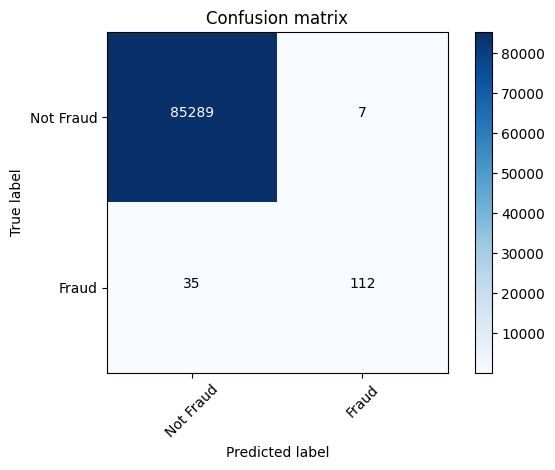

In [25]:
plot_confusion_matrix(y_test, y_pred, model_type)

## Xgboost

In [26]:
model_type= "xgboost"

In [27]:
trainer = ModelTrainer(model_type=model_type)

In [28]:
trainer.data_splitting()

2025-02-17 01:58:58,802 - root - INFO - Data loaded and split into training and testing sets


In [29]:
y_pred, y_test = trainer.training()

c:\Users\Eda AYDIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:58:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2025-02-17 01:59:00,827 - root - INFO - xgboost training completed


In [30]:
trainer.evaluate_performance(y_pred)

{'model': 'xgboost',
 'accuracy': 0.9995786664794073,
 'precision': 0.944,
 'recall': 0.8027210884353742,
 'f1_score': 0.8676470588235294}

In [31]:
results.append(trainer.evaluate_performance(y_pred))

Confusion matrix, without normalization
[[85289     7]
 [   29   118]]


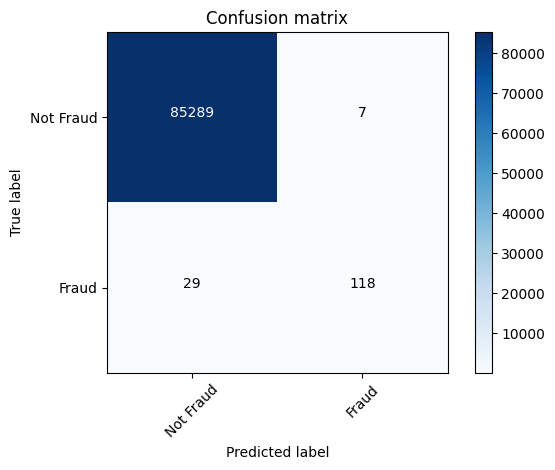

In [32]:
plot_confusion_matrix(y_test, y_pred, model_type)

## LightGBM

In [33]:
model_type= "lightgbm"

In [34]:
trainer = ModelTrainer(model_type=model_type)

In [35]:
trainer.data_splitting()

2025-02-17 01:59:03,859 - root - INFO - Data loaded and split into training and testing sets


In [36]:
y_pred, y_test = trainer.training()

c:\Users\Eda AYDIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Eda AYDIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 345, number of negative: 199019
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001731 -> initscore=-6.357611
[LightGBM] [Info] Start training from score -6.357611


2025-02-17 01:59:05,295 - root - INFO - lightgbm training completed


In [37]:
trainer.evaluate_performance(y_pred)

{'model': 'lightgbm',
 'accuracy': 0.9950025162974147,
 'precision': 0.19827586206896552,
 'recall': 0.6258503401360545,
 'f1_score': 0.3011456628477905}

In [38]:
results.append(trainer.evaluate_performance(y_pred))

Confusion matrix, without normalization
[[84924   372]
 [   55    92]]


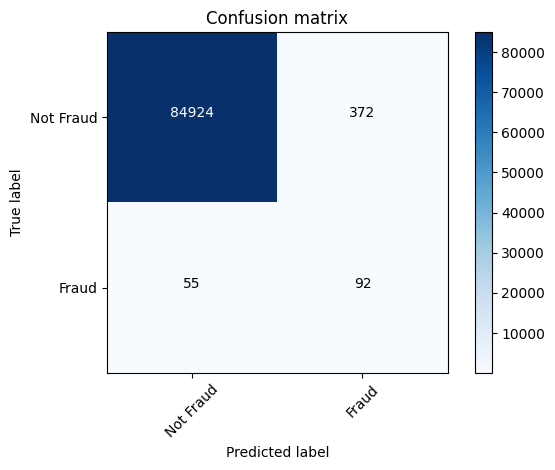

In [39]:
plot_confusion_matrix(y_test, y_pred, model_type)

## Deep Learning

In [40]:
def evaluate_deep_learning_model(results, dnn_trainer, model_type):
    y_pred, y_test = dnn_trainer.build_deep_learning_model(model_type = model_type)
    results.append(dnn_trainer.evaluate_performance(y_pred.round()))
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_type)

In [41]:
dnn_trainer = ModelTrainer()

In [42]:
dnn_trainer.data_splitting()

2025-02-17 01:59:08,236 - root - INFO - Data loaded and split into training and testing sets


c:\Users\Eda AYDIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-17 01:59:08,380 - root - INFO - Deep learning model built and compiled


Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9986 - loss: 0.0168
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9992 - loss: 0.0042
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9994 - loss: 0.0039
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9995 - loss: 0.0031
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9993 - loss: 0.0032
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step
Confusion matrix, without normalization
[[85273    23]
 [   29   118]]


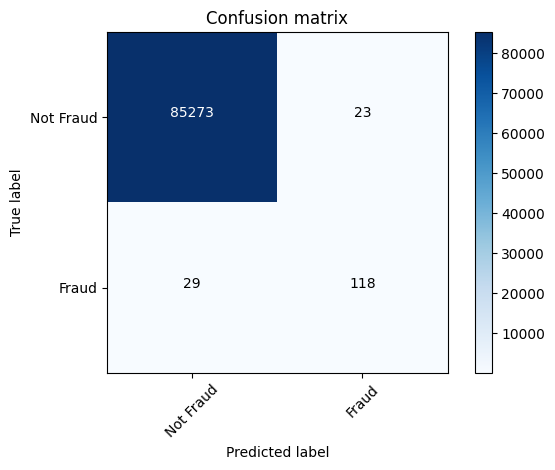

In [43]:
evaluate_deep_learning_model(results, dnn_trainer, "dnn")

### Undersampled Data

In [45]:
dnn_trainer.undersample_data()

2025-02-17 02:00:43,011 - root - INFO - Data undersampled successfully


c:\Users\Eda AYDIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-17 02:00:43,086 - root - INFO - Deep learning model built and compiled


Epoch 1/5
26582/26582 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.9970 - loss: 0.0176
Epoch 2/5
26582/26582 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.9994 - loss: 0.0033
Epoch 3/5
26582/26582 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9993 - loss: 0.0034
Epoch 4/5
26582/26582 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9993 - loss: 0.0037
Epoch 5/5
26582/26582 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.9994 - loss: 0.0032
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Confusion matrix, without normalization
[[170575     37]
 [    50    223]]


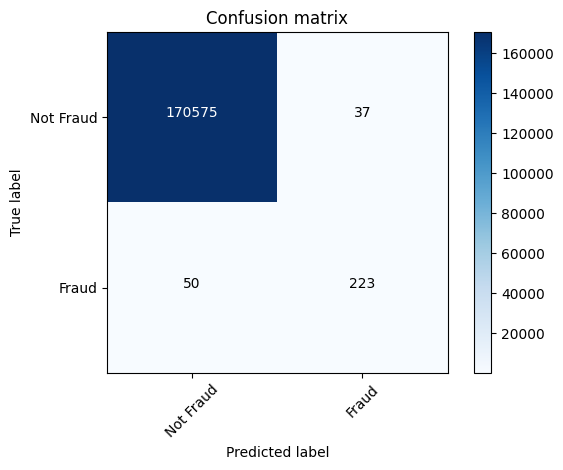

In [46]:
evaluate_deep_learning_model(results, dnn_trainer, model_type="dnn_undersampled")

### SMOTE Sampling

In [ ]:
dnn_trainer.smote_data()



2025-02-17 02:03:53,521 - root - INFO - Data oversampled using SMOTE successfully


c:\Users\Eda AYDIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-17 02:03:53,590 - root - INFO - Deep learning model built and compiled


Epoch 1/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - accuracy: 0.9643 - loss: 0.0880
Epoch 2/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.9946 - loss: 0.0192
Epoch 3/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9963 - loss: 0.0144
Epoch 4/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9970 - loss: 0.0120
Epoch 5/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9973 - loss: 0.0110
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 5s 930us/step
Confusion matrix, without normalization
[[84860   312]
 [    1 85416]]


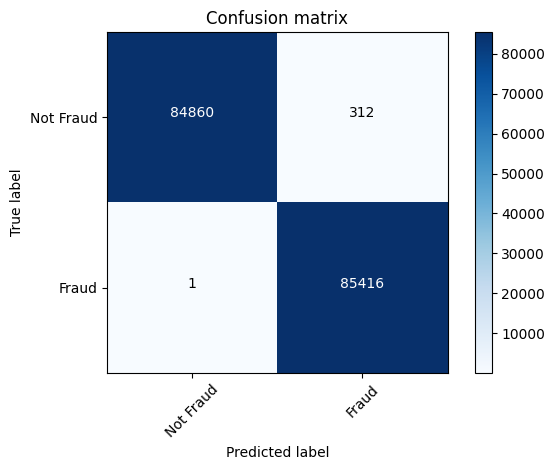

In [48]:
evaluate_deep_learning_model(results, dnn_trainer, model_type="dnn_smote")

# Model Evaluation

In [51]:
import pandas as pd

results_df = pd.DataFrame(results)

results_df

,model,accuracy,precision,recall,f1_score
0,decision_tree,0.999333,0.835821,0.761905,0.797153
1,random_forest,0.999508,0.941176,0.761905,0.842105
2,xgboost,0.999579,0.944000,0.802721,0.867647
3,lightgbm,0.995003,0.198276,0.625850,0.301146
4,dnn,0.999391,0.836879,0.802721,0.819444
5,dnn_undersampled,0.999491,0.857692,0.816850,0.836773
6,dnn_smote,0.998165,0.996361,0.999988,0.998171


In [52]:
import os

results_df.to_csv(os.path.join(config.DataConfig.DATA_DIR, 'model_results.csv'), index=False)